In [1]:
#Reproducing Original Model
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
from sklearn.metrics import mean_squared_error
import matplotlib.pylab as plt
import dmba 
from dmba import regressionSummary
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
print('done')

done


In [2]:
# Reading In Dataframe
df = pd.read_csv("D600 Task 3 Dataset 1 Housing Information.csv")
print(df) # There are 7000 records

        ID        Price  SquareFootage  NumBathrooms  NumBedrooms  \
0     4922  255614.8992         566.62      1.000000            4   
1     5009  155586.0947        1472.34      1.000000            2   
2     4450  131050.8324         550.00      1.779354            3   
3     1070  151361.7125         941.81      2.035254            2   
4      400  113167.6128         550.00      1.064644            3   
...    ...          ...            ...           ...          ...   
6995  6987  307821.1758         550.00      2.111022            4   
6996  6995  421368.8869        1726.12      4.056115            2   
6997  6996  473382.5348        1026.36      2.077177            5   
6998  6998  343397.9756        2218.22      1.000000            4   
6999  7000  438060.8193        1553.57      3.988377            4   

      BackyardSpace  CrimeRate  SchoolRating  AgeOfHome  DistanceToCityCenter  \
0            779.42      20.56          5.62      39.46                 10.08   
1        

In [3]:
# Identifying Predictors For Model from Task 1

Predictors = ['SquareFootage', 'NumBathrooms',
              'NumBedrooms', 'AgeOfHome', 'Floors', 'Windows']
outcome = 'Price'

scaler= StandardScaler()
standardized_predictor=scaler.fit_transform(df[Predictors])
df[Predictors]=standardized_predictor

columnskept = ['SquareFootage', 'NumBathrooms',
              'NumBedrooms', 'AgeOfHome', 'Floors', 'Windows', 'Price']
dfkept = df.filter(items=columnskept)
dfkept.head()

,SquareFootage,NumBathrooms,NumBedrooms,AgeOfHome,Floors,Windows,Price
0,-1.132277,-1.187828,0.970213,-0.230889,-0.438098,-0.363983,255614.8992
1,0.993926,-1.187828,-0.986989,-0.197846,-0.438098,0.084154,155586.0947
2,-1.171293,-0.369602,-0.008388,0.049814,2.249618,1.988736,131050.8324
3,-0.251508,-0.100938,-0.986989,1.506508,-0.438098,-0.251949,151361.7125
4,-1.171293,-1.119960,-0.008388,-0.943973,-0.438098,0.532291,113167.6128


In [4]:
dfkept.to_csv('D600T3Standard.csv')
#All these variables look very close to zero on mean, and very close to 1 on standard deviation

In [5]:
dfkept.describe()

,SquareFootage,NumBathrooms,NumBedrooms,AgeOfHome,Floors,Windows,Price
count,7000.000000,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03
mean,0.000000,1.299278e-16,1.624098e-16,-4.060244e-17,-6.496391e-17,-1.319579e-16,3.072820e+05
std,1.000071,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.501734e+05
min,-1.171293,-1.187828e+00,-1.965590e+00,-1.472336e+00,-4.380977e-01,-2.492634e+00,8.500000e+04
25%,-0.911152,-8.827976e-01,-9.869889e-01,-8.195139e-01,-4.380977e-01,-5.880518e-01,1.921075e+05
50%,-0.123544,-1.402883e-01,-8.388008e-03,-1.314469e-01,-4.380977e-01,-1.399148e-01,2.793230e+05
75%,0.688636,6.641519e-01,9.702129e-01,6.430807e-01,-4.380977e-01,4.202565e-01,3.918781e+05
max,4.286005,3.859180e+00,3.906016e+00,4.150208e+00,4.937334e+00,5.237730e+00,1.046676e+06


In [6]:
#Doing PCA
pca = PCA()
X_pca = pca.fit_transform(standardized_predictor)

# Built the Matrix
pca_components = pca.components_

# Visually Displayed the Matrix

pca_loadings_df = pd.DataFrame(pca_components, columns=Predictors, index=[f"PC{i+1}" for i in range(pca_components.shape[0])])

# Display the loadings matrix
print("PCA Loadings (Components):")
print(pca_loadings_df)

PCA Loadings (Components):
     SquareFootage  NumBathrooms  NumBedrooms  AgeOfHome    Floors   Windows
PC1       0.008394      0.006725     0.009783  -0.021246  0.706883  0.706861
PC2       0.553539      0.550737     0.456364  -0.426072 -0.015208 -0.015727
PC3       0.424012      0.441938    -0.424656   0.666656  0.007101  0.009574
PC4      -0.099557     -0.074921     0.781825   0.610881  0.003030  0.006405
PC5       0.709639     -0.703922     0.007301   0.019902 -0.015703  0.014470
PC6       0.015445     -0.014630     0.001111   0.003206  0.706950 -0.706935


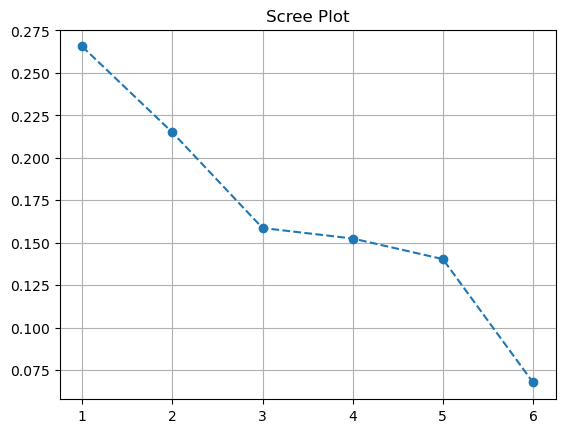

In [7]:
explained_variance = pca.explained_variance_ratio_
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

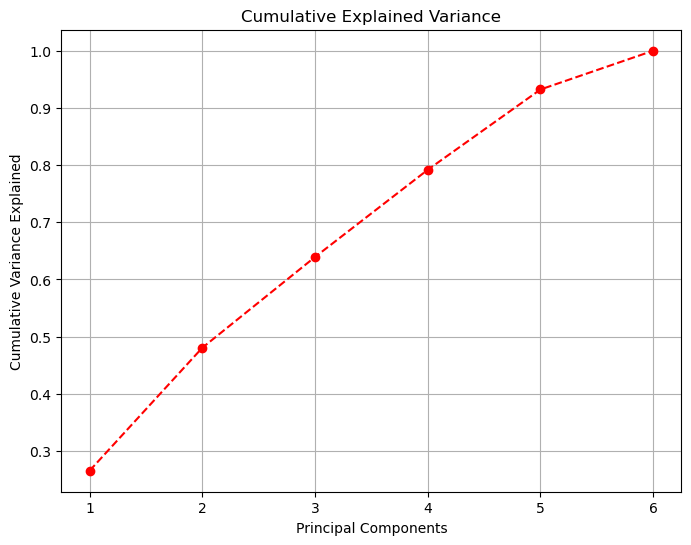

In [8]:
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(8,6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--', color='r')
plt.title('Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.show()

In [9]:
# Get the eigenvalues (explained variance) from PCA
eigenvalues = pca.explained_variance_

#  Keep components with eigenvalues > 1
num_components_to_keep = np.sum(eigenvalues > 1)

# Output the number of components to keep
print(f"Number of principal components to keep (Kaiser Rule): {num_components_to_keep}")

Number of principal components to keep (Kaiser Rule): 2


In [38]:
variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Explained Variance': explained_variance,
    'Explained Variance Ratio': eigenvalues }) 
variance_df.head(2)

,Principal Component,Explained Variance,Explained Variance Ratio
0,PC1,0.265578,1.593694
1,PC2,0.215013,1.290261


In [11]:
#Using Principal Components & Splitting the Data
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6'])
predictors2 = ['PC1', 'PC2']
pca_df = pca_df.filter(items=predictors2)

XPCA = pca_df[['PC1', 'PC2']]
y = dfkept[outcome]

train_X, valid_X, train_y, valid_y = train_test_split(XPCA, y, test_size=0.4, random_state=1)

regressor = LinearRegression()
regressor.fit(train_X, train_y)

print(pd.DataFrame({'Predictor': XPCA.columns, 'coefficient': regressor.coef_}))
regressionSummary(train_y, regressor.predict(train_X))

  Predictor   coefficient
0       PC1   3499.103291
1       PC2  97283.815688

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 104215.5482
            Mean Absolute Error (MAE) : 82245.5239
          Mean Percentage Error (MPE) : -11.5170
Mean Absolute Percentage Error (MAPE) : 31.6580


In [12]:
#Forward Stepwise
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)


best_model, best_variables = stepwise_selection(train_X.columns, train_model, score_model, 
                                 verbose=True)
print(best_variables)


Variables: PC1, PC2
Start: score=112148.24, constant
Step: score=108988.02, add PC2
Step: score=108982.50, add PC1
Step: score=108982.50, unchanged None
['PC2', 'PC1']


In [13]:
# Data Files
valid_df = valid_X.join(valid_y)
train_df = train_X.join(train_y)
valid_df.to_csv('D600T3valid.csv')
train_df.to_csv('D6003train.csv')


# Create the formula for regression
formula = 'Price ~ ' + ' + '.join(predictors2)


In [14]:
#Fit the regression model
train_lin = sm.ols(formula=formula, data=train_df).fit()

# Display the summary of the model
print(train_lin.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     2365.
Date:                Mon, 23 Dec 2024   Prob (F-statistic):               0.00
Time:                        14:35:54   Log-Likelihood:                -54487.
No. Observations:                4200   AIC:                         1.090e+05
Df Residuals:                    4197   BIC:                         1.090e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.077e+05   1608.690    191.273      0.0

In [15]:
#Summary information from training
predicted_values = best_model.predict(train_X[best_variables])
mse = mean_squared_error(train_y, predicted_values)
print(mse)
regressionSummary(train_y, best_model.predict(train_X[best_variables]))

10860880495.957777

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 104215.5482
            Mean Absolute Error (MAE) : 82245.5239
          Mean Percentage Error (MPE) : -11.5170
Mean Absolute Percentage Error (MAPE) : 31.6580


In [16]:
#Summary information from testing
predicted_values = best_model.predict(valid_X[best_variables])
mse = mean_squared_error(valid_y, predicted_values)
print(mse)
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))

10580887697.107815

Regression statistics

                      Mean Error (ME) : -1040.8183
       Root Mean Squared Error (RMSE) : 102863.4420
            Mean Absolute Error (MAE) : 82397.0033
          Mean Percentage Error (MPE) : -11.7847
Mean Absolute Percentage Error (MAPE) : 32.1856


In [34]:
test_lin = sm.ols(formula=formula, data=valid_df).fit()

# Display the summary of the model
print(test_lin.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     1481.
Date:                Mon, 23 Dec 2024   Prob (F-statistic):               0.00
Time:                        14:50:18   Log-Likelihood:                -36284.
No. Observations:                2800   AIC:                         7.257e+04
Df Residuals:                    2797   BIC:                         7.259e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.066e+05   1942.033    157.878      0.0